In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sms

In [2]:
os.listdir('../derivatives/')
sub_df=pd.read_csv('../derivatives/OutlierRuns.tsv',sep='\t')

sub_df=sub_df[sub_df['outlier_run']==False]
sub_df['sub_run']=sub_df['Sub']+'_'+sub_df['run'].astype('str')
sub_df.head()

,Sub,task,run,tsnr,fd_mean,outlier_run,sub_run
0,sub-1001,mid,1,69.988391,0.149729,False,sub-1001_1
1,sub-1001,mid,2,55.697644,0.184703,False,sub-1001_2
2,sub-1002,mid,1,77.148079,0.111157,False,sub-1002_1
3,sub-1002,mid,2,90.519196,0.092381,False,sub-1002_2
4,sub-1003,mid,1,66.602654,0.171448,False,sub-1003_1


In [3]:
#Import the Libraries
import numpy as np
from scipy.io import loadmat  # this is the SciPy module that loads mat-files
import matplotlib.pyplot as plt
from datetime import datetime, date, time
import pandas as pd
import os
from natsort import natsorted
import re

#Make a list of the files
Mat_Beh_dir='/data/projects/istart/Monetary_Incentive/data'
ML_EvFiles_list=natsorted([os.path.join(root,f) for root,dirs,files in os.walk(
    Mat_Beh_dir) for f in files if 'run' in f])

print("The number of Subjects are: %s"%(len([x for x in os.listdir(Mat_Beh_dir) if x.startswith('sub')])))
print("The number of files are: %s"%(len(ML_EvFiles_list)))
print("----------------------------------------")
#Make Conditions for Run1 and Run2
run_cond=loadmat('%s/../timing/run1.mat'%(Mat_Beh_dir))
run1=run_cond['run']['cond'][0,0]
run1 = np.where(run1==['1'], 'Large_gain', run1)
run1 = np.where(run1==[1], 'Large_gain', run1)
run1 = np.where(run1==['2'], 'Large_loss', run1)
run1 = np.where(run1==['3'], 'Small_gain', run1)
run1 = np.where(run1==['4'], 'Small_loss', run1)
run1 = np.where(run1==['5'], 'Neutral', run1)
run1=np.concatenate(run1)

run_cond=loadmat('%s/../timing/run2.mat'%(Mat_Beh_dir))
run2=run_cond['run']['cond'][0,0]
run2 = np.where(run2==[1], 'Large_gain', run2)
run2 = np.where(run2==['1'], 'Large_gain', run2)
run2 = np.where(run2==['2'], 'Large_loss', run2)
run2 = np.where(run2==['3'], 'Small_gain', run2)
run2 = np.where(run2==['4'], 'Small_loss', run2)
run2 = np.where(run2==['5'], 'Neutral', run2)
run2=np.concatenate(run2)


The number of Subjects are: 60
The number of files are: 83
----------------------------------------


/tmp/ipykernel_142026/2876148422.py:22: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  run1 = np.where(run1==['1'], 'Large_gain', run1)
/tmp/ipykernel_142026/2876148422.py:23: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  run1 = np.where(run1==[1], 'Large_gain', run1)


In [4]:
display(ML_EvFiles_list)

['/data/projects/istart/Monetary_Incentive/data/sub-1001/run-1_output.mat',
 '/data/projects/istart/Monetary_Incentive/data/sub-1001/run-2_output.mat',
 '/data/projects/istart/Monetary_Incentive/data/sub-1002/run-1_output.mat',
 '/data/projects/istart/Monetary_Incentive/data/sub-1002/run-2_output.mat',
 '/data/projects/istart/Monetary_Incentive/data/sub-1003/run-1_output.mat',
 '/data/projects/istart/Monetary_Incentive/data/sub-1004/run-1_output.mat',
 '/data/projects/istart/Monetary_Incentive/data/sub-1004/run-2_output.mat',
 '/data/projects/istart/Monetary_Incentive/data/sub-1006/run-1_output.mat',
 '/data/projects/istart/Monetary_Incentive/data/sub-1007/run-1_output.mat',
 '/data/projects/istart/Monetary_Incentive/data/sub-1007/run-2_output.mat',
 '/data/projects/istart/Monetary_Incentive/data/sub-1009/run-1_output.mat',
 '/data/projects/istart/Monetary_Incentive/data/sub-1009/run-2_output.mat',
 '/data/projects/istart/Monetary_Incentive/data/sub-1010/run-1_output.mat',
 '/data/proj

In [5]:
data_dir='/data/projects/istart/Monetary_Incentive/'
len(os.listdir('%s/bids_archive/bids'%(data_dir)))

48

In [6]:
len(sub_df['Sub'].unique())

51

In [7]:
data=[]
for ML_EvFile in ML_EvFiles_list:
    #print(ML_EvFile)
    sub='sub-'+re.search('sub-(.*)/',ML_EvFile).group(1)
    run=re.search('run-(.*)_out',ML_EvFile).group(1)
    if sub+'_'+run in sub_df['sub_run'].values:
        #print(sub,run)
        mat = loadmat(ML_EvFile)  # load mat-file
        mdata = mat['output']  # variable in mat file
        mdtype = mdata.dtype  # dtypes of structures are "unsized objects"
        # * SciiencPy reads in structures as structureprintd NumPy arrays of dtype object
        # * The size of the array is the size of the structure array, not the number
        #   elements in any particular field. The shape defaults to 2-dimensional.
        # * For convene make a dictionary of the data using the names from dtypes
        # * Since the structure has only one element, but is 2-D, index it at [0, 0]
        ndata = {n: mdata[n][0, 0] for n in mdtype.names}
        # Reconstruct the columns of the data table from just the time series
        # Use the number of intervals to test if a field is a column or metadata
        columns = [n for n in ndata]
        #Check fo frame
        # now make a data frame, setting the time stamps as the index
        lens=[len(x[0]) for x in ndata.values()]
        if lens.count(lens[0]) == len(lens):
            df = pd.DataFrame(np.transpose(np.concatenate([ndata[c] for c in columns])),
                      columns=columns)
            if run=='1':
                if len(df)==50:
                    df['trial_type']=run1[0:50]
                elif len(df)==75:
                    df['trial_type']=run1
            if run=='2':
                df['trial_type']=run2
            df['sub']=sub
            df['run']=run
            data.append(df)
df=pd.concat(data)

<AxesSubplot:xlabel='RT', ylabel='Count'>

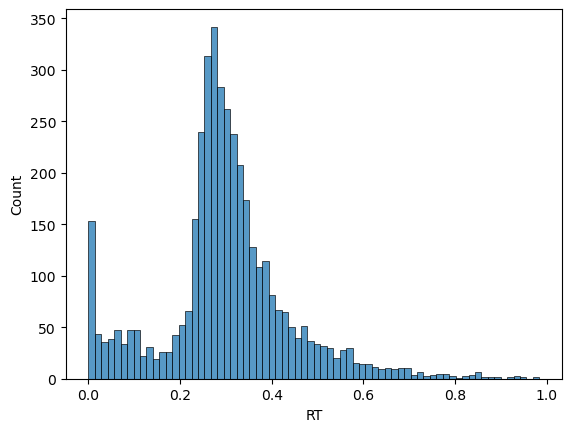

In [8]:
sms.histplot(x=df['RT'])

In [9]:
misses=[]
for sub in df['sub'].unique():
    tmp=df[df['sub']==sub]
    for run in tmp['run'].unique():
        tmp=tmp[tmp['run']==run]
        misses.append(len(tmp[(tmp['RT']==0)&(tmp['outcome']==0)]))


In [10]:
df.loc[df["trial_type"] == "1", "trial_type"] = "Large_gain"
df['run']=df['run'].astype(int)
df.groupby(by=['sub','run']).max().reset_index()


,sub,run,outcome,trial_starts,target_starts,RT,thresh,trial_type
0,sub-1001,1,1.0,443.596841,445.607023,0.690546,0.584389,Small_loss
1,sub-1001,2,1.0,450.916843,454.927744,0.846985,0.511823,Small_loss
2,sub-1002,1,1.0,443.595531,445.605782,0.491392,0.464767,Small_loss
3,sub-1002,2,1.0,450.928644,454.939221,0.571258,0.466639,Small_loss
4,sub-1003,1,1.0,443.546470,445.555652,0.738533,0.496835,Small_loss
...,...,...,...,...,...,...,...,...
64,sub-3200,1,1.0,679.617062,682.619710,0.856139,0.459021,Small_loss
65,sub-3206,1,1.0,679.662808,682.665302,0.813503,0.693730,Small_loss
66,sub-3212,1,1.0,679.607846,682.610161,0.857764,0.456245,Small_loss
67,sub-3218,1,1.0,679.653301,682.655712,0.557942,0.466697,Small_loss


In [11]:
no_miss=df[(df['RT']>0.001)]
no_miss[no_miss['RT']==0]
df=no_miss

<AxesSubplot:xlabel='RT', ylabel='Count'>

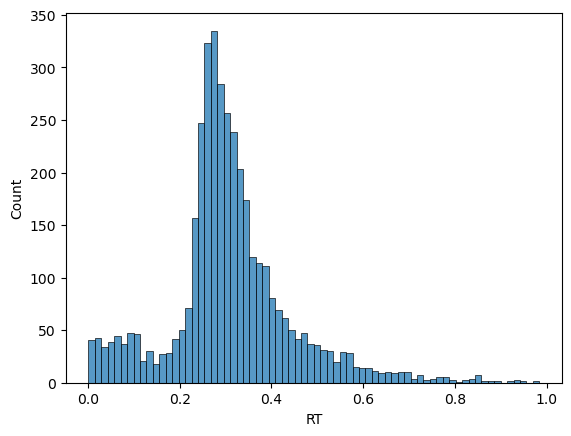

In [12]:
sms.histplot(x=df['RT'])

In [13]:
df.loc[df["trial_type"] == "1", "trial_type"] = "Large_gain"

df['Trial_code']=df['trial_type'].map({"Large_loss":-2,"Small_loss":-1,"Neutral":0,"Small_gain":1,"Large_gain":2})
df['Trial_code'].unique()

array([-1,  0, -2,  2,  1])

,sub,trial_type,outcome,trial_starts,target_starts,RT,thresh,run,Trial_code
0,sub-1001,Large_gain,1.0,246.980226,249.991329,0.305435,0.418198,1.5,2.0
1,sub-1001,Large_loss,1.0,185.605540,188.116553,0.308371,0.411154,1.5,-2.0
2,sub-1001,Neutral,1.0,207.873973,209.884223,0.332187,0.443540,1.5,0.0
3,sub-1001,Small_gain,1.0,281.873566,285.883902,0.320507,0.376292,1.5,1.0
4,sub-1001,Small_loss,1.0,156.110382,159.620759,0.362250,0.426017,1.5,-1.0


/tmp/ipykernel_142026/1342539350.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sms.barplot(x='Trial_code',y='RT',data=group_df,ci=68)


<AxesSubplot:xlabel='Trial_code', ylabel='RT'>

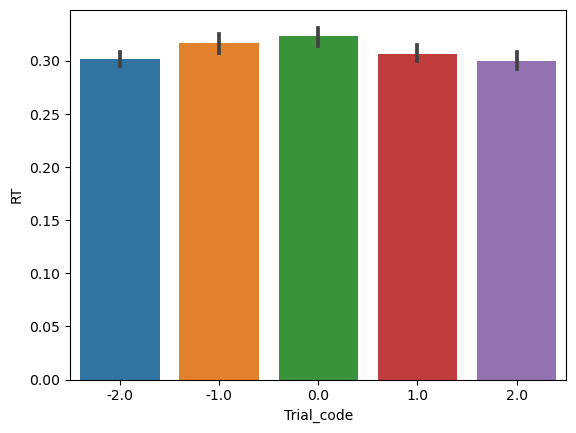

In [14]:
df['run']=df['run'].astype(int)
group_df=df.groupby(by=['sub','trial_type']).median()
group_df=group_df.reset_index()
display(group_df.head())
sms.barplot(x='Trial_code',y='RT',data=group_df,ci=68)

In [15]:
from scipy.stats import ttest_rel
print("Is the Mean RT difference between large and small gains significant")
ttest_rel(group_df[group_df['trial_type']=='Large_gain']['RT'],
         group_df[group_df['trial_type']=='Neutral']['RT'])

Is the Mean RT difference between large and small gains significant


Ttest_relResult(statistic=-2.779007797819919, pvalue=0.007760874307797847)

In [16]:
print("Is the Mean RT difference between large and small losses significant")

ttest_rel(group_df[group_df['trial_type']=='Large_loss']['RT'],
         group_df[group_df['trial_type']=='Neutral']['RT'])

Is the Mean RT difference between large and small losses significant


Ttest_relResult(statistic=-3.080052481734173, pvalue=0.0034201062580108766)

In [17]:
import numpy as np

data=[]
#polynomial fit with degree = 2
for sub in group_df['sub'].unique():
    tmp=group_df[group_df['sub']==sub]
    LG_RT=tmp[tmp['trial_type']=="Large_gain"]['RT'].values[0]
    LL_RT=tmp[tmp['trial_type']=="Large_loss"]['RT'].values[0]
    Neu_RT=tmp[tmp['trial_type']=="Neutral"]['RT'].values[0]
    model = np.poly1d(np.polyfit(tmp['Trial_code'].values, tmp['RT'].values, 2))
    
    data.append([sub,model[2],
                 LG_RT-Neu_RT,
                 LL_RT-Neu_RT])
Fits=pd.DataFrame(columns=['Sub','V_beta','LG-N','LL-N'],data=data)

In [18]:
Fits.to_csv('../derivatives/Fits_of_RT.csv',index=False)

In [19]:
per_df=pd.read_excel('../derivatives/covariates/final_output_composite_wfnames.xls')
per_df['Subject']='sub-'+per_df['Subject'].astype('str')
per_df

,Subject,Fnames-act,Fnames-ppi,Ones,Composite_Substance,Composite_Reward,Composite_Reward_Squared,tsnr,fd_mean,Composite_SubstanceXReward,Composite_SubstanceXReward_Squared,Unnamed: 11,Unnamed: 12,fd_mean.1
0,sub-1001,/data/projects/istart-mid/derivatives/fsl/sub-...,NaN,1.0,0.534825,0.469388,-8.028738,-0.379745,0.030117,-0.191576,3.342227,NaN,NaN,-0.334966
1,sub-1003,/data/projects/istart-mid/derivatives/fsl/sub-...,NaN,1.0,0.044818,0.469388,-8.028738,-0.114737,0.105981,-0.421580,3.234266,NaN,NaN,1.517712
2,sub-1004,/data/projects/istart-mid/derivatives/fsl/sub-...,NaN,1.0,-0.249186,2.469388,-2.151187,-0.076754,-0.474856,-1.057953,1.704889,NaN,NaN,-0.364555
3,sub-1006,/data/projects/istart-mid/derivatives/fsl/sub-...,NaN,1.0,-1.131198,-0.530612,-7.967514,1.360129,-0.870765,0.157611,2.905903,NaN,NaN,-0.883898
4,sub-1009,/data/projects/istart-mid/derivatives/fsl/sub-...,NaN,1.0,-1.131198,1.469388,-6.089963,1.238442,0.036518,-2.104785,0.782022,NaN,NaN,-0.290715
5,sub-1010,/data/projects/istart-mid/derivatives/fsl/sub-...,NaN,1.0,3.340563,-1.530612,-5.906289,-0.480247,0.055851,-5.555724,11.050575,NaN,NaN,0.600550
6,sub-1011,/data/projects/istart-mid/derivatives/fsl/sub-...,NaN,1.0,-1.425202,2.469388,-2.151187,-0.049279,0.495952,-3.961993,-5.466314,NaN,NaN,1.575204
7,sub-1012,/data/projects/istart-mid/derivatives/fsl/sub-...,NaN,1.0,-1.425202,-4.530612,12.277384,1.950944,-1.066111,6.014421,-26.029944,NaN,NaN,-0.500486
8,sub-1013,/data/projects/istart-mid/derivatives/fsl/sub-...,NaN,1.0,-0.771860,4.469388,11.726364,1.707433,-1.317167,-3.892357,-12.193833,NaN,NaN,-1.249693
9,sub-1015,/data/projects/istart-mid/derivatives/fsl/sub-...,NaN,1.0,2.396851,-3.530612,4.216160,0.807888,0.215301,-8.904970,33.101678,NaN,NaN,0.048934


In [20]:
total_df=pd.merge(Fits, per_df, how='left', left_on=['Sub'], right_on=['Subject'])
total_df.head()

,Sub,V_beta,LG-N,LL-N,Subject,Fnames-act,Fnames-ppi,Ones,Composite_Substance,Composite_Reward,Composite_Reward_Squared,tsnr,fd_mean,Composite_SubstanceXReward,Composite_SubstanceXReward_Squared,Unnamed: 11,Unnamed: 12,fd_mean.1
0,sub-1001,-0.008537,-0.026752,-0.023816,sub-1001,/data/projects/istart-mid/derivatives/fsl/sub-...,NaN,1.0,0.534825,0.469388,-8.028738,-0.379745,0.030117,-0.191576,3.342227,NaN,NaN,-0.334966
1,sub-1002,-0.013022,-0.072843,-0.063259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sub-1003,-0.000617,0.054024,-0.014524,sub-1003,/data/projects/istart-mid/derivatives/fsl/sub-...,NaN,1.0,0.044818,0.469388,-8.028738,-0.114737,0.105981,-0.421580,3.234266,NaN,NaN,1.517712
3,sub-1004,-0.002456,0.020756,-0.019793,sub-1004,/data/projects/istart-mid/derivatives/fsl/sub-...,NaN,1.0,-0.249186,2.469388,-2.151187,-0.076754,-0.474856,-1.057953,1.704889,NaN,NaN,-0.364555
4,sub-1006,-0.005296,-0.023401,-0.022996,sub-1006,/data/projects/istart-mid/derivatives/fsl/sub-...,NaN,1.0,-1.131198,-0.530612,-7.967514,1.360129,-0.870765,0.157611,2.905903,NaN,NaN,-0.883898


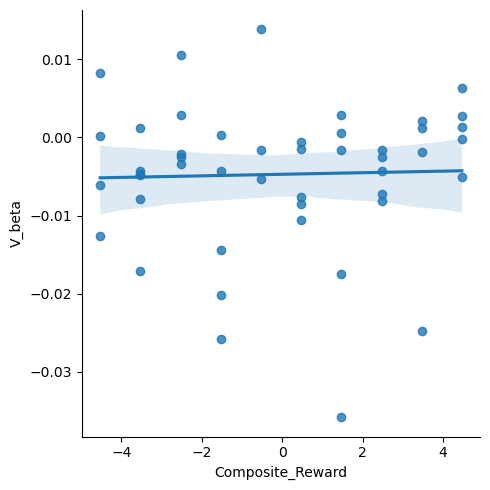

r:  0.031408541232004754 p: 0.8339958709309961


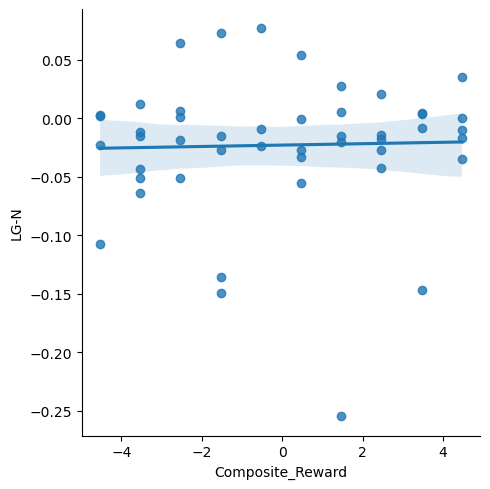

r:  0.02959529822846262 p: 0.8434559796521016


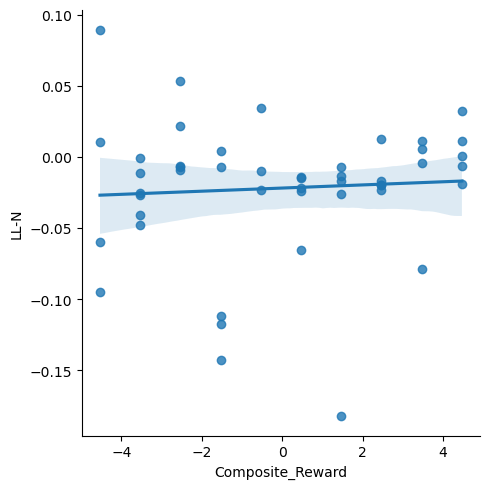

r:  0.06727498783524083 p: 0.6532121500429536


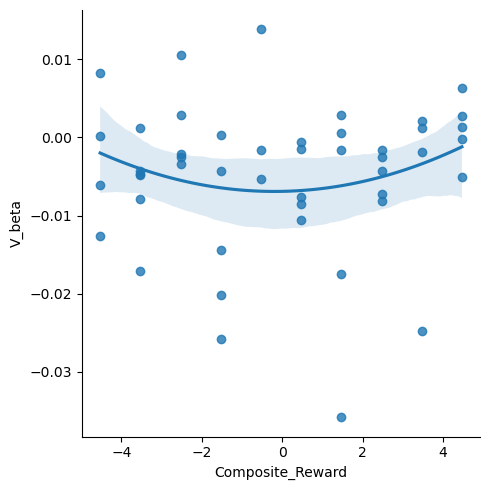

r:  0.2018392496674905 p: 0.17366244150741736


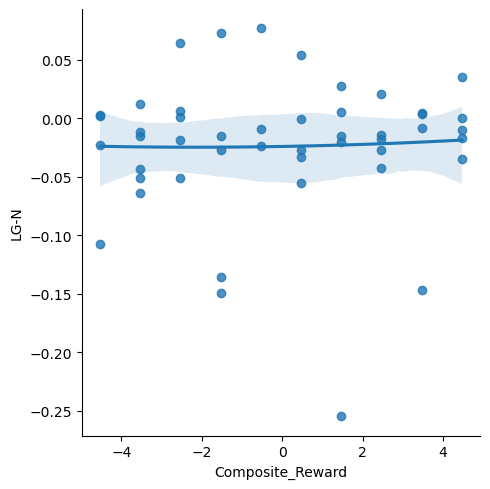

r:  0.01679281661035346 p: 0.9107968388523219


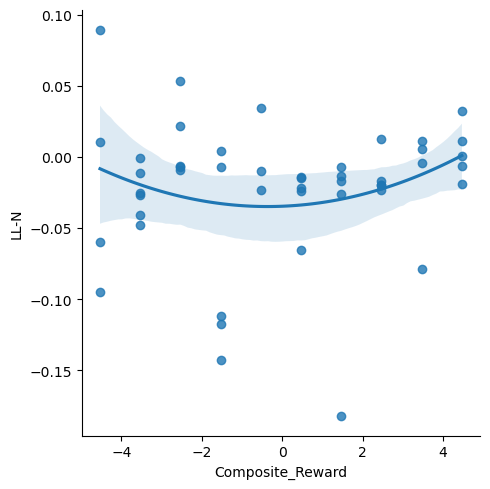

r:  0.22924446403876508 p: 0.1211357400741344


In [22]:
from scipy.stats import pearsonr,kendalltau
responses=['V_beta','LG-N','LL-N']

total_df=total_df[~total_df['Composite_Reward'].isna()]

for resp in responses:
    sms.lmplot(x='Composite_Reward',y=resp,data=total_df,order=1)
    plt.show()
    r,p=pearsonr(total_df['Composite_Reward'],total_df[resp])
    print('r:  %s p: %s'%(r,p))
for resp in responses:
    sms.lmplot(x='Composite_Reward',y=resp,data=total_df,order=2)
    plt.show()
    r,p=pearsonr(total_df['Composite_Reward_Squared'],total_df[resp])
    print('r:  %s p: %s'%(r,p))

    